In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('bank-additional-full.csv', sep=';')  

# Check the first 5 rows
print(data.head())

# Check column names
print(data.columns)

# Check basic info
print(data.info())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [2]:
print(data.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [3]:
print(data['y'].value_counts())


y
no     36548
yes     4640
Name: count, dtype: int64


In [4]:
print(data.describe())


               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

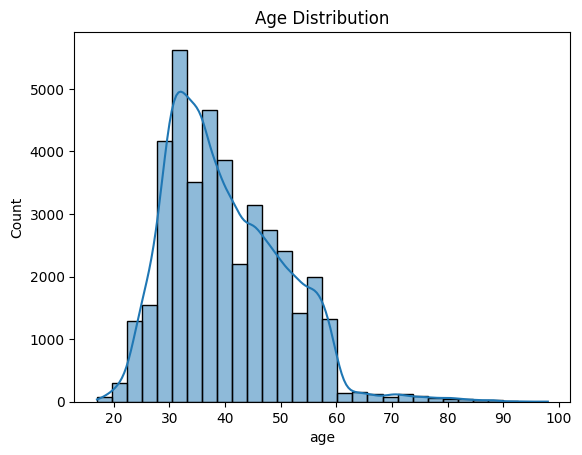

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


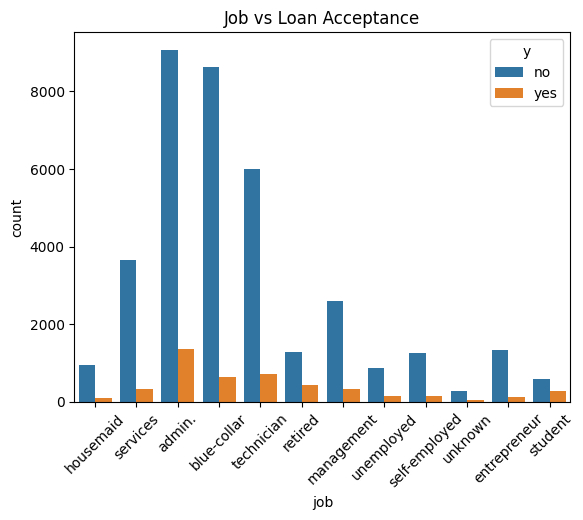

In [6]:
sns.countplot(x='job', hue='y', data=data)
plt.title('Job vs Loan Acceptance')
plt.xticks(rotation=45)
plt.show()


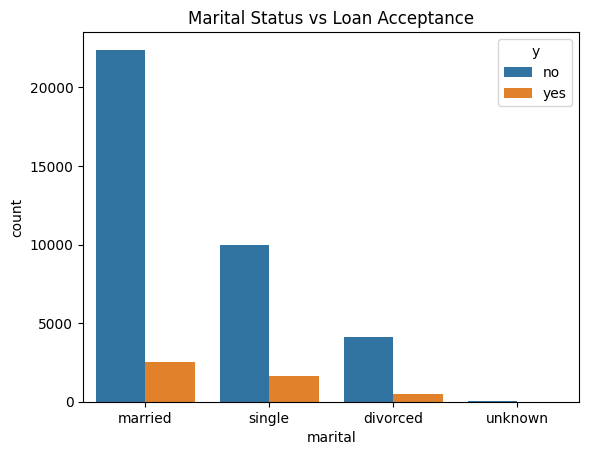

In [7]:
sns.countplot(x='marital', hue='y', data=data)
plt.title('Marital Status vs Loan Acceptance')
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome']

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Encode target variable: yes=1, no=0
data['y'] = data['y'].map({'yes': 1, 'no': 0})


In [9]:
X = data.drop('y', axis=1)
y = data['y']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9100509832483612
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



c:\Users\Bisma Shahzadi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Accuracy: 0.911750424860403
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.51      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



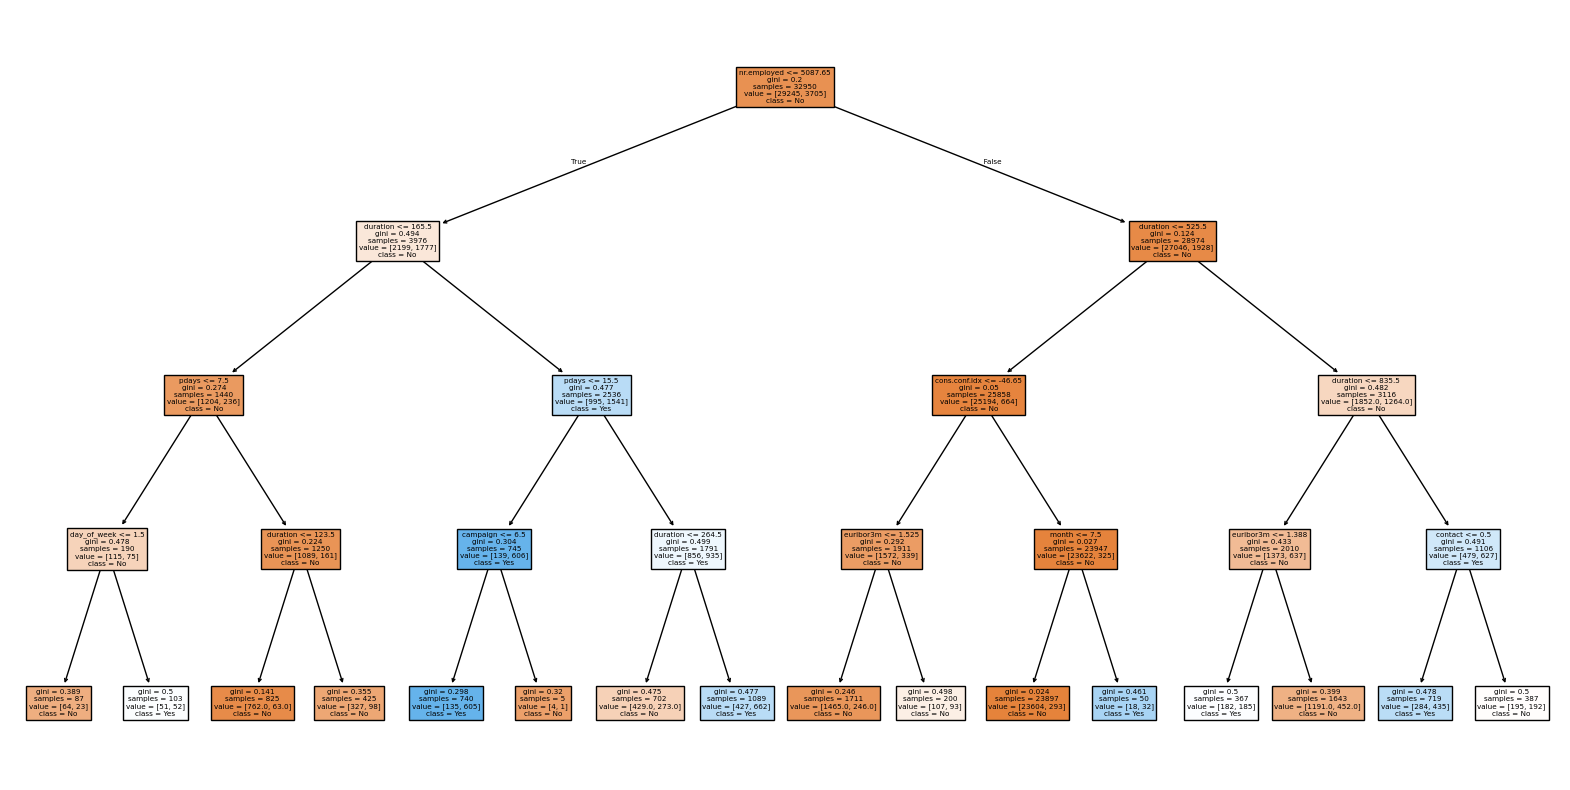

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()


In [13]:
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_[0]})
coeff_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
16,cons.price.idx,0.547290
14,poutcome,0.368456
2,marital,0.107918
3,education,0.048669
17,cons.conf.idx,0.040342
9,day_of_week,0.034605
1,job,0.014182
10,duration,0.004541
0,age,0.002262
18,euribor3m,0.001030


In [14]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
importance.sort_values(by='Importance', ascending=False)


,Feature,Importance
10,duration,0.493551
19,nr.employed,0.381721
12,pdays,0.042505
17,cons.conf.idx,0.035839
18,euribor3m,0.025811
8,month,0.014836
7,contact,0.002251
9,day_of_week,0.002058
11,campaign,0.001429
13,previous,0.000000


In [15]:
# Probabilities of each class
y_prob = lr.predict_proba(X_test)  # returns [[prob_no, prob_yes], ...]

# Example for first customer
print("Probability of accepting loan:", y_prob[0][1])


Probability of accepting loan: 0.08934373647881468
